# SC Green's Function

We compute here the Green's function for the superconductor where we assumed perfect translational invariance in all directions.

*[...] Calculation Details [...]*


The calculations for the real-time components is straightforward and yields the following results: 
consistently with the assumption of a conventional $s$-wave pairing, the off-diagonal (diagonal) part of the normal (anomalous) propagator vanishes
$$
    \mathcal{G}_{\uparrow\downarrow} = \mathcal{G}_{\downarrow\uparrow} = 0 \,,
    \qquad
    \mathcal{F}^\dagger_{\uparrow\uparrow} = \mathcal{F}^\dagger_{\downarrow\downarrow} = 0 \,,
$$
while the nontrivial components are given by
$$
    \mathcal{G}_{\uparrow\uparrow} = \mathcal{G}_{\downarrow\downarrow} = 
    \frac{\hbar( \hbar\omega + \varepsilon_k)}{(\hbar \omega)^2 - E_k^2} \,,
    \qquad
    \mathcal{F}^\dagger_{\downarrow\uparrow} = -\mathcal{F}^\dagger_{\uparrow\downarrow} =  
    \frac{i \hbar \Delta^\star}{(\hbar \omega)^2 - E_k^2} \,,
$$
where we defined $\varepsilon_k = \frac{\hbar^2 k^2}{2m}-\mu$, $k^2 = k_x^2 + k_y^2 + k_z^2$ and $E_k=\sqrt{\varepsilon_k^2+|\Delta|^2}$.
Therefore, within the ordinary BCS assumptions, normal and anomalous Green's functions in the bulk superconductor can be written as
$$
    \mathcal{G}_S^{(0)} =
    \frac{\hbar}{(\hbar \omega)^2 - E_k^2} 
    \begin{bmatrix}
        \hbar\omega + \varepsilon_k & 0 \\[5pt]
        0 & \hbar\omega + \varepsilon_k
    \end{bmatrix} \,,
    \qquad
    \mathcal{F}^{\dagger \, (0)}_S = 
    \frac{i \hbar}{(\hbar \omega)^2 - E_k^2}
    \begin{bmatrix}
        0 & - \Delta^\star \\[5pt]
        \Delta^\star & 0
    \end{bmatrix} \,.
$$


While the previous equations describe the bulk of a translational invariant superconductor, we are ultimately interested in the characterization of the pairing induced in the topological insulator.
For this purpose, we need to express $\mathcal{G}_S$ and $\mathcal{F}_S^\dagger$ as functions of the out-of-plane coordinate $z$ and $z'$.
Taking the Fourier anti-transform  we have
$$
	\mathcal{G}^{(0)}_S(z,z') \equiv \mathcal{G}^{(0)}_S(z-z') =
	\int \frac{d k_z}{2\pi} \, e^{i k_z (z-z')} \mathcal{G}^{(0)}_S(k_z) \,,
$$
and
$$
	\mathcal{F}^{\dagger \, (0)}_S(z,z') \equiv \mathcal{F}^{\dagger \, (0)}_S(z-z') =
	\int \frac{d k_z}{2\pi} \, e^{i k_z (z-z')} \mathcal{F}^{\dagger \, (0)}_S(k_z) \,,
$$
where we dropped the indices for the in-plane wavenumber $k_x$ and $k_y$.
Both integrals can be computed using contour integrals living in the complex plane.

#### <font> **Poles** </font> 

We can observe that both normal and anomalous Green's function share the same poles, which are given by the zeros of the denominator $(\hbar \omega)^2 - E_k^2 =  0$.
With some straightforward algebra, the 4 poles of the integrand functions can be written as
$$
    \boxed{k_p = \pm i \sqrt{\frac{1}{t} (\varepsilon_0 \pm \omega_0)}} \,,
$$
where $t=\frac{\hbar^2}{2m}$, $\varepsilon_0 = t(k_x^2+k_y^2)-\mu$ and $\omega_0 = \sqrt{(\hbar\omega)^2-|\Delta|^2}$.
It is important to note that the order  and the position of the poles in the complex plane depend on the energy $\hbar \omega$.

In [11]:
import numpy as np

# Function defining the poles 
def poles(kx, ky, omega, Delta, mu, t = 1., hbar = 1.):
 
    e0 = t*(kx**2+ky**2)-mu

    w0 = np.sqrt( complex((hbar*omega)**2 - np.abs(Delta)**2) )

    return np.multiply( np.sqrt([1./t*(e0+w0), 1./t*(e0+w0), 1./t*(e0-w0), 1./t*(e0-w0)]), [-1j,1j,-1j,1j])

In order to study the induced proximity effect, we are interested in tunnelling of electrons with energy below the SC gap $\Delta$, i.e. we restrict ourselves to the range of frequencies $-|\Delta| < \hbar \omega < |\Delta|$.
In this conditions we have that
  $$ 
  \omega_0 = \sqrt{(\hbar \omega)^2-|\Delta|^2} = i \sqrt{|\Delta|^2-(\hbar \omega)^2} \,,
  $$
is always a purely imaginary number.
In order to understand the distribution of the poles on the complex plane, the square root $\sqrt{\frac{1}{t} (\varepsilon_0 \pm \omega_0)}$ can be evaluated explicitly and the poles can be rewritten as 
$$
    k_1 = \xi_- - i\xi_+ \,, 
    \qquad
    k_2 = -\xi_- + i\xi_+ \,,
    \qquad
    k_3 = -\xi_- - i\xi_+ \,, 
    \qquad
    k_4 = \xi_- + i\xi_+ \,,
$$
where
$$
      \xi_\pm = \sqrt{\frac{1}{2t} \left( \sqrt{E_0^2-(\hbar \omega)^2} \pm \varepsilon_0 \right)} \,,
      \qquad
      E_0 = \sqrt{\varepsilon_0^2 + |\Delta|^2} \,.
$$
In this way, it is clear that the poles are complex with nonzero real and imaginary parts, and they lie on the circumference of radius $|k_p| = \frac{1}{t} \sqrt{E_0^2 - (\hbar \omega)^2}$, centred in the origin.



#### <font color='green'> **Poles** </font> 
Below, the four poles $k_p$ of the integrand function are plotted in the complex plane for energies $0 \leq \hbar \omega \leq |\Delta|$.


[ 0.10540398-0.j -0.10540398+0.j  0.10540398-0.j -0.10540398+0.j] 0.10904127658827184


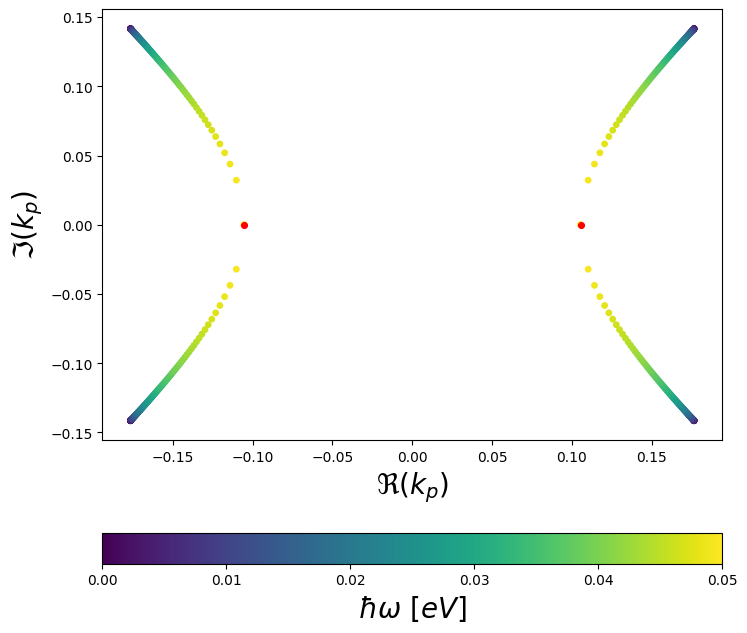

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# parameters
kx = 0.073; ky = 0.081; Delta = 0.05; e0 = kx**2+ky**2; E0 = np.sqrt(e0**2+np.abs(Delta)**2); mu = 0.023
# energies 
Nene = 100; omega = np.linspace(0., Delta, Nene)
# compute poles
kp = np.array([poles(kx, ky, w, Delta, mu) for w in omega])

# figure
fig, ax = plt.subplots(1,1, figsize=(8,8))

# loop over poles
for ipole in range(4):
    # plot ploes on complex plane
    plt.scatter(kp[:,ipole].real, kp[:,ipole].imag, c=omega, cmap='viridis', s=15);


# colorbar
cbar = plt.colorbar(location='bottom')
cbar.set_label('$\hbar \omega$ $[eV]$', fontsize = 20)

# poles at Delta gap
kpDelta = poles(kx, ky, Delta, Delta, mu)
plt.scatter(kpDelta.real, kpDelta.imag, c='red', s=15);
print(kpDelta, np.sqrt(e0))

# poles at E0 energy
#kpE0 = poles(kx, ky, E0, Delta, mu); 
#plt.scatter(kpE0.real, kpE0.imag, c='black', s=15);


# labels
ax.set_xlabel('$\Re (k_p)$', fontsize = 20)
ax.set_ylabel('$\Im (k_p)$', fontsize = 20);
#ax.tick_params(axis='both', which='major', labelsize=16);

## **Contour Integrals**

In all that follows we rename $k_z \equiv k$ in order to simplify the notation.
Assuming a complex momentum $k = k_r + i k_i$, the above integrals can be evaluated in the complex plane through the residue theorem if the exponential factor 
$$
	e^{i k(z-z')} = e^{i k_r(z-z')} e^{-k_i (z-z')} \,,
$$
converges in in the limit of large $k_i$. 
For $k_i>0$, we have
$$
	\lim_{k_i \rightarrow +\infty} e^{-k_i (z-z')} = 
	\begin{cases}
		0 & \text{if} \quad z-z' \geq 0 \,, \\[5pt]
		+ \infty  & \text{if} \quad z-z' < 0 \,,
	\end{cases}
$$
and conversely for $k_i<0$
$$
	\lim_{k_i \rightarrow -\infty} e^{-k_i (z-z')} = 
	\begin{cases}
		+ \infty  & \text{if} \quad z-z' \geq 0 \,, \\[5pt]
		0 & \text{if} \quad z-z' < 0 \,,
	\end{cases}
$$
meaning that to ensure the convergence of the integrand function for large imaginary part of $k$ we need to choose a closed path in the upper half of the complex plane when $z-z' \geq 0$ or in the lower one when $z-z' < 0$.

In general, the integral of a complex-valued function $f$ over a closed path $\gamma$ in the complex plane can be computed through the residue theorem as
$$
\oint_\gamma f(k) \, dk = 2\pi i \sum_j I(\gamma, k_j) \text{Res}(f,k_j) \,,
$$
where $k_j$ are the poles enclosed by $\gamma$, $\text{Res}(f,k_j)$ is the residue of the function $f$ in $k_j$ and $I(\gamma, k_j)$ is the winding number of $\gamma$ around $k_j$, whose sign is positive (negative) for an anticlockwise (clockwise) loop.
If we choose as closed path the semicircle $C_R^\pm$ of radius $R$ lying in the upper (lower) half of the complex plane, the integral can be decomposed as 
$$
	\oint f(k) \, dk = 
	\int_{-R}^R dk \, f(k) + 
	\int_{C_R^\pm} dk \, f(k) \,.
$$
If in the limit of large $|z|$ the integrand function decays at least as $|f(z)| \sim 1/|z|^a$ for $a>1$, then by Jordan's lemma we have that
$$
	\lim_{R \rightarrow +\infty} \int_{C_R^\pm} dk \, f(k) = 0 \,,	
$$
and taking the limit $R \rightarrow +\infty$ we obtain
$$
	\oint f(k) \, dk = 
	\lim_{R \rightarrow \infty} \int_{-R}^R dk \, f(k) + 
	\lim_{R \rightarrow \infty} \int_{C^\pm_R} dk \, f(k) =
	\int dk \, f(k) \,.
$$
Therefore, by means of residues theorem, the integral on the real axis can be computed as the sum of the residues enclosed by the loop
$$	
    \int  \frac{dk}{2\pi} \, f(k) =
	\oint \frac{dk}{2\pi} \, f(k) = 
	\pm i \sum_j \text{Res}(f,k_j) \,,
$$
where the positive (negative) sign is for the loop closed in the upper (lower) half-plane.

#### <font> **Integration Path** </font> 

For both normal and anomalous Green's function, the integral can be computed along the following paths in the limit of $R \rightarrow +\infty$.
As discussed above, the blue path in the upper plane is valid for $z-z' \geq 0$ while the red one in the lower plane is valid for $z-z' < 0$.

<p style="text-align:center;">
<img src="Path-integrals.png" width=50% height=50% class="center" />
</p>

## **Normal Green's Function**

The normal Green's function is explicitly given by
$$
    \mathcal{G}_{\sigma\sigma}^{(0)}(z-z', \omega) =
	\int \frac{d k}{2\pi} \, f(k) \,,
    \qquad
    f(k) \equiv e^{i k_z (z-z')} 
    \frac{\hbar( \hbar\omega + \varepsilon_k)}{(\hbar \omega)^2 - E_k^2} \,.  
$$
To perform the integration, we distinguish the following cases:

---
- i. **Upper plane** \
  For $z-z' \geq 0$ we select the loop closed in the upper half of the complex plane.
  The integral can thus be evaluated as
  $$
      \int \frac{d k}{2\pi} \, f(k) 
      =
      i \Bigl\lbrack \text{Res}(f,k_2) + \text{Res}(f,k_4) \Bigr\rbrack \,.
  $$
  Since all the poles are *simple* poles, the residues can be computed as
  $$
      \text{Res}(f,k_p) = \lim_{k \rightarrow k_p} (k - k_p) f(k) \,,
  $$
  yielding 
  $$
  \text{Res}(f,k_2) =
  \frac{\hbar (\hbar\omega-\omega_0)}{4t\omega_0} \frac{1}{k_+} e^{i k_+ (z-z')} \,,
  \qquad
  \text{Res}(f,k_4) =
  -\frac{\hbar (\hbar\omega+\omega_0)}{4t\omega_0} \frac{1}{k_-} e^{i k_- (z-z')} \,,
  $$
  where we introduced a new notation for the poles $k_\pm = i \sqrt{\frac{1}{t}(\varepsilon_0 \pm \omega_0)}$.
  Skipping some straightforward algebra, the integral can be evaluated as
  $$
      \int \frac{d k}{2\pi} \, f(k) 
      =
      i \Bigl\lbrack \text{Res}(f,k_2) + \text{Res}(f,k_4) \Bigr\rbrack 
      =
      \frac{i\hbar}{4t\omega_0}
      \Biggl\lbrack
      \frac{\Omega_-}{k_+} e^{i k_+ (z-z')} - \frac{\Omega_+}{k_-} e^{i k_- (z-z')}
      \Biggr\rbrack \,,
  $$
  where we defined $\Omega_\pm = \hbar\omega \pm \omega_0$.

  ---
- ii. **Upper plane** \
  For $z-z' < 0$ we select the loop closed in the lower half of the complex plane.
  The integral can thus be evaluated as
  $$
      \int \frac{d k}{2\pi} \, f(k) 
      =
      i \Bigl\lbrack \text{Res}(f,k_1) + \text{Res}(f,k_3) \Bigr\rbrack \,.
  $$
  As previously, the residues are given by
  $$
  \text{Res}(f,k_1) =
  \frac{\hbar (\hbar\omega-\omega_0)}{4t\omega_0} \frac{1}{k_+} e^{-i k_+ (z-z')} \,,
  \qquad
  \text{Res}(f,k_3) =
  \frac{\hbar (\hbar\omega+\omega_0)}{4t\omega_0} \frac{1}{k_-} e^{-i k_- (z-z')} \,,
  $$
  and the integral can be evaluated as
  $$
      \int \frac{d k}{2\pi} \, f(k) 
      =
      i \Bigl\lbrack \text{Res}(f,k_1) + \text{Res}(f,k_3) \Bigr\rbrack 
      =
      \frac{i\hbar}{4t\omega_0}
      \Biggl\lbrack
      \frac{\Omega_-}{k_+} e^{-i k_+ (z-z')} - \frac{\Omega_+}{k_-} e^{-i k_- (z-z')}
      \Biggr\rbrack \,.
  $$

The two results can be easily condensed in the following way:
  $$
    \mathcal{G}_{\sigma\sigma}^{(0)}(z-z', \omega) =
    \int \frac{d k}{2\pi} e^{i k_z (z-z')} 
    \frac{\hbar( \hbar\omega + \varepsilon_k)}{(\hbar \omega)^2 - E_k^2} 
     =
     \boxed{
     \frac{i\hbar}{4t\omega_0}
     \Biggl\lbrack
     \frac{\Omega_-}{k_+} e^{i k_+ |z-z'|} - \frac{\Omega_+}{k_-} e^{i k_- |z-z'|}
     \Biggr\rbrack 
     } \,.
  $$